Training model with batch size 10...
Epoch 1/50, Train Loss: inf, Test Loss: inf
Epoch 2/50, Train Loss: nan, Test Loss: nan
Epoch 3/50, Train Loss: nan, Test Loss: nan
Epoch 4/50, Train Loss: nan, Test Loss: nan
Epoch 5/50, Train Loss: nan, Test Loss: nan
Epoch 6/50, Train Loss: nan, Test Loss: nan
Epoch 7/50, Train Loss: nan, Test Loss: nan
Epoch 8/50, Train Loss: nan, Test Loss: nan
Epoch 9/50, Train Loss: nan, Test Loss: nan
Epoch 10/50, Train Loss: nan, Test Loss: nan
Epoch 11/50, Train Loss: nan, Test Loss: nan
Epoch 12/50, Train Loss: nan, Test Loss: nan
Epoch 13/50, Train Loss: nan, Test Loss: nan
Epoch 14/50, Train Loss: nan, Test Loss: nan
Epoch 15/50, Train Loss: nan, Test Loss: nan
Epoch 16/50, Train Loss: nan, Test Loss: nan
Epoch 17/50, Train Loss: nan, Test Loss: nan
Epoch 18/50, Train Loss: nan, Test Loss: nan
Epoch 19/50, Train Loss: nan, Test Loss: nan
Epoch 20/50, Train Loss: nan, Test Loss: nan
Epoch 21/50, Train Loss: nan, Test Loss: nan
Epoch 22/50, Train Loss: na

<ipython-input-10-13a6d9a5d940>:25: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
<ipython-input-10-13a6d9a5d940>:51: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * grad_w


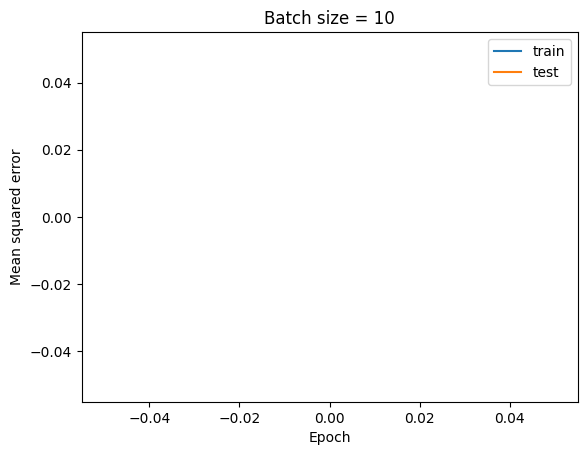

Average test loss for batch size 10: nan

Training model with batch size 50...
Epoch 1/50, Train Loss: 555441232164667813445166423513243804489951590012023914060591437745789770535211631930376104262680980993914142800506074955776.0000, Test Loss: 525005675810223356471413409519649450806426229980922895709971197679081467682287155934331049523019065715095041420433748393984.0000
Epoch 2/50, Train Loss: 134171806949765466990611478449330613110978210750414742930345904664434989194737778324502811849549188390398471819652270749137462176875845222744888287725477022322379606550046402221646035851837281971736850495957935094677982042341538991921301460877312.0000, Test Loss: 126819804049404025201342908795297072462273848235752474336750824146967699022512936311253896786924907301952723257961787838825811123484148269266402716767866868653231382194983072295678494764852375596595364845298414487210038553297319860374623672598528.0000
Epoch 3/50, Train Loss: inf, Test Loss: inf
Epoch 4/50, Train Loss: inf, Test Loss: inf

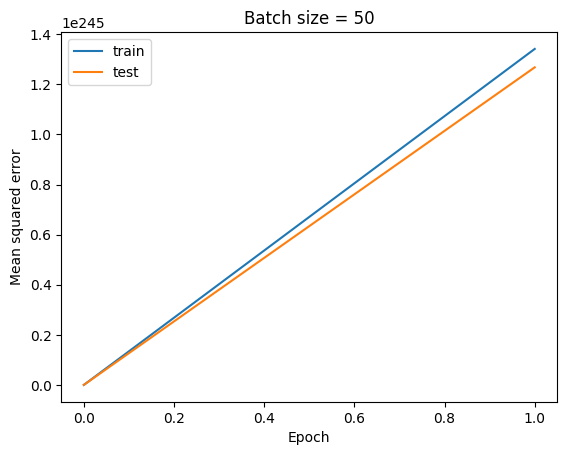

Average test loss for batch size 50: nan

Training model with batch size 100...
Epoch 1/50, Train Loss: 884636670681894009267526909019151214371563121510668077891584.0000, Test Loss: 836162635865331328731377243578985923814545192077878687170560.0000
Epoch 2/50, Train Loss: 15028901253152612125817912307482236354788826100544476898976773266752592973926156703889054722527693557611706311113502097408.0000, Test Loss: 14205385996730872140377314461826028932867043102902653341260489452102377895414746787552255003805806828637929532186383351808.0000
Epoch 3/50, Train Loss: 259578260783566632860285779879497333928304481653091672055721043578942689067105284056541791909477808811820141490859711744046337996912495567411542685767962018173193733708017886627364864.0000, Test Loss: 245354544176967802293600331671440578337333041213592795052034906514472131225818672462245438843856041191460570569062216794042560808179388068064134358919891757003964179156836339899432960.0000
Epoch 4/50, Train Loss: 4273324880056217838605

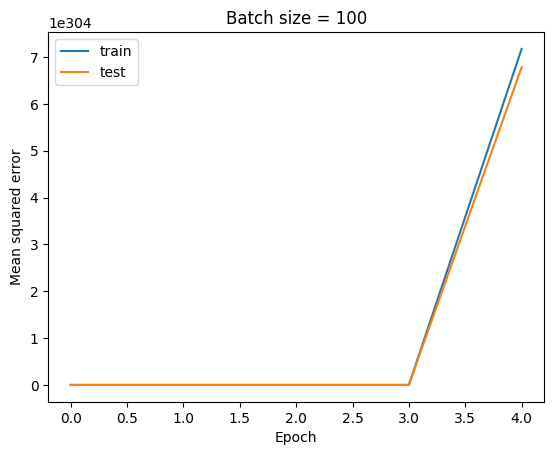

Average test loss for batch size 100: nan



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
data = pd.read_csv('/content_folder/linreg-data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split data into training and test sets
np.random.seed(0)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# define linear regression model
def predict(X, w, b):
    return np.dot(X, w) + b

def loss(X, y, w, b):
    y_pred = predict(X, w, b)
    return np.mean((y_pred - y) ** 2)

def gradient(X, y, w, b):
    y_pred = predict(X, w, b)
    grad_w = 2 * np.dot(X.T, (y_pred - y)) / len(y)
    grad_b = 2 * np.mean(y_pred - y)
    return grad_w, grad_b

def fit(X, y, batch_size, epochs, learning_rate):
    num_batches = len(X) // batch_size
    if len(X) % batch_size:
        num_batches += 1
    w = np.zeros(X.shape[1])
    b = 0
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(len(X))
        X_train = X[indices]
        y_train = y[indices]
        for i in range(num_batches):
            start = i * batch_size
            end = (i + 1) * batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            grad_w, grad_b = gradient(X_batch, y_batch, w, b)
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b
        train_loss = loss(X_train, y_train, w, b)
        test_loss = loss(X_test, y_test, w, b)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    return w, b, train_losses, test_losses

# train model with different batch sizes
batch_sizes = [10, 50, 100]
epochs = 50
learning_rate = 0.01

for batch_size in batch_sizes:
    print(f'Training model with batch size {batch_size}...')
    w, b, train_losses, test_losses = fit(X_train, y_train, batch_size, epochs, learning_rate)
    
    # plot the loss curves for this batch size
    plt.plot(range(epochs), train_losses, label='train')
    plt.plot(range(epochs), test_losses, label='test')
    plt.title(f'Batch size = {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean squared error')
    plt.legend()
    plt.show()
    
    # evaluate model on test set
    test_loss = np.mean((y_test - predict(X_test, w, b)) ** 2)
    print(f'Average test loss for batch size {batch_size}: {test_loss:.4f}\n')
